In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
import os
import cv2 as cv
import glob as gb
np.random.seed(2)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [2]:
s=64
X_train=[]
y_train=[]

code={'Uninfected':0,'Parasitized':1}
    
def getcode(n):
    for x,y in code.items() :
        if n==y :
            return x

In [3]:
trainpath = r'../input/cell-images-for-detecting-malaria/cell_images/'

for folder in os.listdir(trainpath):
    files=gb.glob(pathname=str(trainpath+folder+'/*.png'))
    for file in files :
        image=cv.imread(file)
        X_train.append(list(cv.resize(image,(s,s))))
        y_train.append(code[folder])

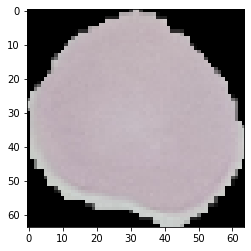

In [4]:
plt.imshow(X_train[0])
plt.show()

In [5]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_train=np.array(X_train)
y_train=np.array(y_train)



In [6]:
image_gen = ImageDataGenerator(
    
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True

)


image_gen.fit(X_train, augment=True)

In [7]:
model1=Sequential([

    Conv2D(filters=32,kernel_size=(2,2),padding='valid',activation='relu',input_shape=(s,s,3)),
    
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64,kernel_size=(2,2),padding='valid',activation='relu'),
    
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=128,kernel_size=(2,2),padding='same',activation='relu'),

    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    
    MaxPooling2D(pool_size=(3,3),strides=(2,2)),

    Flatten(),

    Dense(256,activation='relu'),
    
    Dense(265,activation='relu'),

    Dense(128,activation='relu'),
    
    Dense(64,activation='relu'),

    Dense(1,activation='sigmoid')

    ])



model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [8]:


callback = EarlyStopping(restore_best_weights=True, patience=2)



In [9]:
history = model1.fit(X_train,y_train,validation_split=0.1,epochs=100,batch_size=32, callbacks=[callback], verbose=1)
len(history.history['loss'])

Epoch 1/100
776/776 [==============================] - 9s 6ms/step - loss: 0.6873 - accuracy: 0.7689 - val_loss: 0.1625 - val_accuracy: 0.9507
Epoch 2/100
776/776 [==============================] - 4s 5ms/step - loss: 0.1436 - accuracy: 0.9555 - val_loss: 0.2055 - val_accuracy: 0.9292
Epoch 3/100
776/776 [==============================] - 4s 5ms/step - loss: 0.1380 - accuracy: 0.9549 - val_loss: 0.1505 - val_accuracy: 0.9528
Epoch 4/100
776/776 [==============================] - 4s 5ms/step - loss: 0.1199 - accuracy: 0.9593 - val_loss: 0.1367 - val_accuracy: 0.9568
Epoch 5/100
776/776 [==============================] - 4s 5ms/step - loss: 0.1221 - accuracy: 0.9583 - val_loss: 0.1609 - val_accuracy: 0.9550
Epoch 6/100
776/776 [==============================] - 4s 5ms/step - loss: 0.1169 - accuracy: 0.9596 - val_loss: 0.1397 - val_accuracy: 0.9536


6

In [10]:
ModelLoss, ModelAccuracy = model1.evaluate(X_train, y_train)
y_pred=model1.predict(X_train)
print(ModelLoss)
print(ModelAccuracy)



862/862 [==============================] - 2s 3ms/step - loss: 0.1085 - accuracy: 0.9632
0.10849031805992126
0.9632411599159241


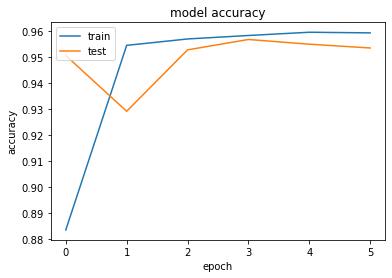

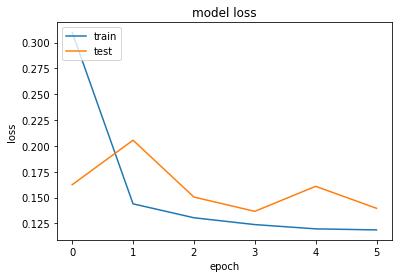

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()